# Clustering

## Problem Statement

Students have to evaluate a lot of factors before taking a decision to join a university for their higher education requirements.
The objective of this project is to simplify the process of applying for appropriate universities which are of similar nature. 

`CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

**Objective(s):** Maximize the convience of admission process

**Constraints:** Minimize the brain drain


**Success Criteria**

- **Business Success Criteria**: Reduce the application process time from anywhere between 20% to 40%

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: US Higher education department will see an increase in revenues by atleast 30%

**Proposed Plan:**
Grouping the available universities will allow to understand the characteristics of each group.

## Data Collection

Data: 
   The university details are obtained from the US Higher Education Body and is publicly available for students to access.

Data Dictionary:
- Dataset contains 25 university details
- 7 features are recorded for each university

Description:
- Univ - University Name
- State - Location (state) of the university
- SAT - Average SAT score for eligibility
- Top10 - % of students who ranked in top 10 in their previous academics
- Accept - % of students admitted to the universities
- SFRatio - Student to Faculty ratio
- Expenses - Overall cost in USD
- GradRate - % of students who graduate

#### Install the required packages if not available

In [4]:
# !pip install feature_engine
# !pip install dtale

**Importing required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from kneed import KneeLocator

### Suppress the Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Import the data**

In [74]:
df = pd.read_excel(r"C:\Users\asus\DataScience\codes_DS_sample\clustering_University_csv\University_Clustering.xlsx")
df

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***Descriptive Statistics and Data Distribution Function***

In [5]:
df.describe()

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


# Data Preprocessing

In [6]:
# Drop the unwanted features
df1 = df.drop(["UnivID"], axis = 1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


## Checking Null Values

In [8]:
df1.isnull().sum()

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

### PCA can be implemented only on Numeric features

In [31]:
numeric_features = df1.select_dtypes(exclude = ['object']).columns

In [32]:
numeric_features

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

## Define the Pipeline steps

#### Define PCA model

In [11]:
pca = PCA(n_components = 6)

## Make Pipeline

**By using Mean imputation null values can be impute**

**Data has to be standardized to address the scale difference**

In [94]:
num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler(), pca)

In [95]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df1[numeric_features]) 

In [96]:
processed

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

In [84]:
# Apply the pipeline on the dataset
univ = pd.DataFrame(processed.transform(df1[numeric_features]))

univ

,0,1,2,3,4,5
0,-1.008824,-1.069154,0.078815,0.053320,-0.124905,-0.045254
1,-2.822327,2.252320,0.844907,0.136340,-0.091849,-0.173769
2,1.112562,1.626748,-0.256960,1.080296,-0.175069,0.334079
3,-0.683955,0.031322,0.150691,-0.081396,-0.627660,0.091600
4,-0.310925,-0.640049,0.006737,0.165489,0.018108,-0.023414
5,-1.695867,-0.348666,-0.255731,0.009171,-0.055605,-0.035697
6,-1.245805,-0.496317,-0.043130,-0.218671,0.290790,-0.074597
7,-0.389018,-0.782644,-0.464465,0.064073,-0.549292,-0.083806
8,-2.373384,-0.392515,0.112782,-0.452592,-0.243764,0.259592
9,-1.402687,2.116496,-0.446030,-0.641238,0.218553,-0.224627


## Save the data preprocessing pipeline with Imputation and Standardization


In [47]:
import joblib

joblib.dump(processed, 'Data_prep_DimRed.pkl')

['Data_prep_DimRed.pkl']

## Import the pipeline

In [48]:
import pickle
model = joblib.load("Data_prep_DimRed.pkl")

In [54]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

## Apply the saved model on to the Dataset to extract PCA values

In [97]:
pca_res = pd.DataFrame(model.transform(df1[numeric_features]))

pca_res

,0,1,2,3,4,5
0,-1.008824,-1.069154,0.078815,0.053320,-0.124905,-0.045254
1,-2.822327,2.252320,0.844907,0.136340,-0.091849,-0.173769
2,1.112562,1.626748,-0.256960,1.080296,-0.175069,0.334079
3,-0.683955,0.031322,0.150691,-0.081396,-0.627660,0.091600
4,-0.310925,-0.640049,0.006737,0.165489,0.018108,-0.023414
5,-1.695867,-0.348666,-0.255731,0.009171,-0.055605,-0.035697
6,-1.245805,-0.496317,-0.043130,-0.218671,0.290790,-0.074597
7,-0.389018,-0.782644,-0.464465,0.064073,-0.549292,-0.083806
8,-2.373384,-0.392515,0.112782,-0.452592,-0.243764,0.259592
9,-1.402687,2.116496,-0.446030,-0.641238,0.218553,-0.224627


In [98]:
# PCA weights

model['pca'].components_

array([[-0.45813885, -0.42716104,  0.42420075,  0.3908408 , -0.36243393,
        -0.37892093],
       [ 0.03576417, -0.20143553,  0.31869533, -0.4346534 ,  0.63461057,
        -0.51470747],
       [ 0.18078706,  0.49125198, -0.17425864,  0.59925723,  0.20292589,
        -0.54344578],
       [ 0.1359349 ,  0.35737683,  0.04516736, -0.51115551, -0.62714633,
        -0.44403936],
       [ 0.00545604,  0.51133027,  0.7935202 ,  0.07218408,  0.06811593,
         0.31462193],
       [ 0.85885837, -0.38269024,  0.23750061,  0.18088716, -0.16364553,
         0.00198112]])

In [107]:
# Take a closer look at the components
components = pd.DataFrame(model['pca'].components_, columns = numeric_features).T
components.columns = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5']

components

,pc0,pc1,pc2,pc3,pc4,pc5
SAT,-0.458139,0.035764,0.180787,0.135935,0.005456,0.858858
Top10,-0.427161,-0.201436,0.491252,0.357377,0.511330,-0.382690
Accept,0.424201,0.318695,-0.174259,0.045167,0.793520,0.237501
SFRatio,0.390841,-0.434653,0.599257,-0.511156,0.072184,0.180887
Expenses,-0.362434,0.634611,0.202926,-0.627146,0.068116,-0.163646
GradRate,-0.378921,-0.514707,-0.543446,-0.444039,0.314622,0.001981


In [102]:
print(model['pca'].explained_variance_ratio_)

[0.76862924 0.13140213 0.04771658 0.02696455 0.02106913 0.00421836]


In [103]:
var1 = np.cumsum(model['pca'].explained_variance_ratio_)

print(var1)

[0.76862924 0.90003138 0.94774795 0.97471251 0.99578164 1.        ]


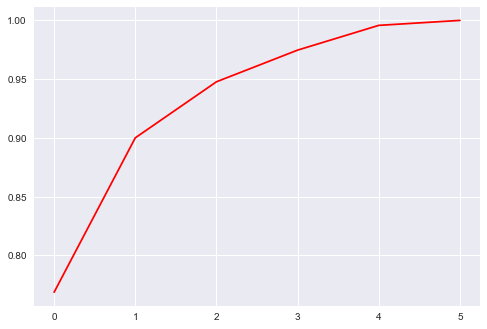

In [104]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

## KneeLocator
Refer the link to understand the parameters used: https://kneed.readthedocs.io/en/stable/parameters.html    


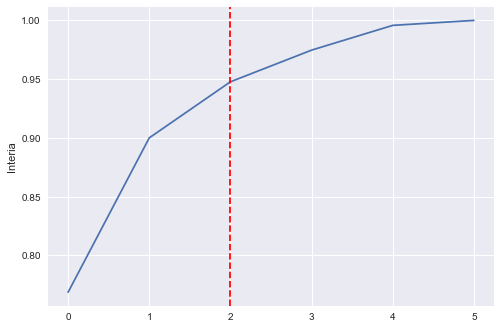

In [105]:
# from kneed import KneeLocator
kl = KneeLocator(range(len(var1)), var1, curve = 'concave', direction = "increasing") 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(len(var1)), var1)
plt.xticks(range(len(var1)))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

Kneelocator recommends 3 PCs as the ideal number of features to be considered

## Save the End to End PCA pipeline with Imputation and Standardization

In [19]:
import os 
os.getcwd()

'C:\\Users\\asus\\DataScience\\codes_DS_sample\\Dimension Reduction'

# PCA for Feature Extraction

In [112]:
# Final dataset with manageble number of columns (Feature Extraction)

final = pd.concat([df.Univ, pca_res.iloc[:, 0:3]], axis = 1)
final.columns = ['Univ', 'pc0', 'pc1', 'pc2']
final

,Univ,pc0,pc1,pc2
0,Brown,-1.008824,-1.069154,0.078815
1,CalTech,-2.822327,2.252320,0.844907
2,CMU,1.112562,1.626748,-0.256960
3,Columbia,-0.683955,0.031322,0.150691
4,Cornell,-0.310925,-0.640049,0.006737
5,Dartmouth,-1.695867,-0.348666,-0.255731
6,Duke,-1.245805,-0.496317,-0.043130
7,Georgetown,-0.389018,-0.782644,-0.464465
8,Harvard,-2.373384,-0.392515,0.112782
9,JohnsHopkins,-1.402687,2.116496,-0.446030


0     Text(-1.0088236818639642, -1.069153876988121, ...
1     Text(-2.8223265589991837, 2.2523202038226833, ...
2     Text(1.1125616303660952, 1.6267483806870124, '...
3     Text(-0.6839552605503287, 0.03132174701491972,...
4     Text(-0.31092450417586887, -0.640048603093426,...
5     Text(-1.6958668099846925, -0.3486658684968763,...
6     Text(-1.2458054535709073, -0.49631688159233045...
7     Text(-0.3890182750152041, -0.7826436177031617,...
8     Text(-2.373384294420653, -0.39251479464304523,...
9     Text(-1.402687491430432, 2.116496488946324, 'J...
10    Text(-1.7256378326780726, 0.08101450295852658,...
11    Text(-0.4499242233205679, -0.01498705112450590...
12    Text(0.041396598813714644, -1.013733035387051,...
13    Text(3.235438940384006, -0.3743761890622646, '...
14    Text(-2.235686952227566, -0.37546499205467027,...
15    Text(5.17452453463629, 0.7782961511779145, 'Pu...
16    Text(-1.6988262921827855, -0.31154757771096553...
17    Text(4.579733553315189, -0.354186618232481

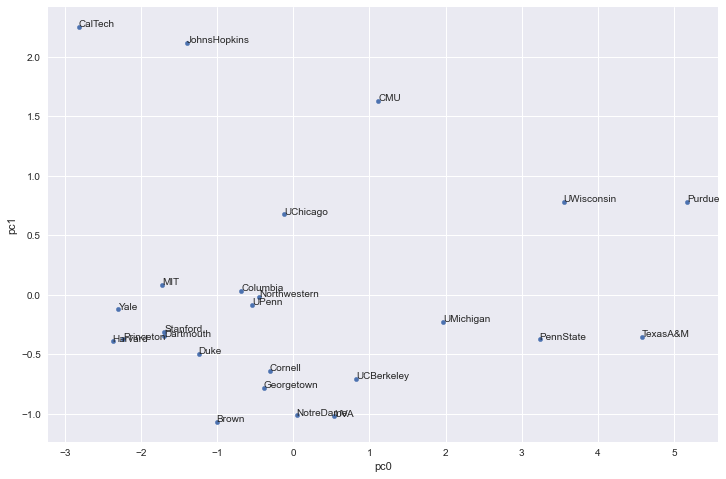

In [113]:
# Scatter diagram
ax = final.plot(x = 'pc0', y = 'pc1', kind = 'scatter', figsize=(12, 8))
final[['pc0', 'pc1', 'Univ']].apply(lambda x: ax.text(*x), axis = 1)